In [1]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create 

# Read in the data

df = pd.read_csv(r'C:\Users\Rafik\Documents\GitHub\Alax_The_Analyst_Portfolio_Projects\movies.csv')

In [2]:
# Let's Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
print(df.isna().sum())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [4]:
# There are a lot of missing values so we will fill all of them

columns_1 = ['rating','company','writer','country','released','star']
for i in columns_1:
    df[i].fillna("Others",inplace=True)

columns_2 = ['runtime','score','votes']
for j in columns_2:
    df[j].fillna(0,inplace=True) 
columns_3 = ['budget','gross']
for k in columns_3:
    df[k].fillna(round(np.mean(df[k])),inplace=True)

df['released'].fillna('0000-00-00',inplace=True)

print(df.isna().sum())

name        0
rating      0
genre       0
year        0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
dtype: int64


In [5]:
# Let's see if there is any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [6]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [7]:
# change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [8]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,Others,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,78500541,Others,90.0
7664,Dream Round,Others,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,35589876,78500541,Cactus Blue Entertainment,90.0
7665,Saving Mbango,Others,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,78500541,Embi Productions,0.0
7666,It's Just Us,Others,Drama,2020,"October 1, 2020 (United States)",0.0,0.0,James Randall,James Randall,Christina Roz,United States,15000,78500541,Others,120.0


In [9]:
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3818,"Love, Honor and Obey",R,Comedy,2000,"February 9, 2001 (United States)",6.5,5200.0,Dominic Anciano,Dominic Anciano,Sadie Frost,United Kingdom,35589876,1400,British Broadcasting Corporation (BBC),103.0
7625,The Untold Story,Others,Comedy,2019,"January 11, 2019 (United States)",5.7,320.0,Shane Stanley,Lee Stanley,Miko Hughes,United States,35589876,790,Visual Arts Entertainment,104.0
7580,Run with the Hunted,Not Rated,Crime,2019,"June 26, 2020 (United States)",5.2,735.0,John Swab,John Swab,Ron Perlman,United States,35589876,682,Roxwell Films,93.0
2417,Madadayo,Others,Drama,1993,"April 17, 1993 (Japan)",7.3,5100.0,Akira Kurosawa,Ishirô Honda,Tatsuo Matsumura,Japan,11900000,596,DENTSU Music And Entertainment,134.0


In [10]:
# Drop any duplicates

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2386, dtype: object

In [11]:
# Guesses
# Budget high correlation
# company high correlation

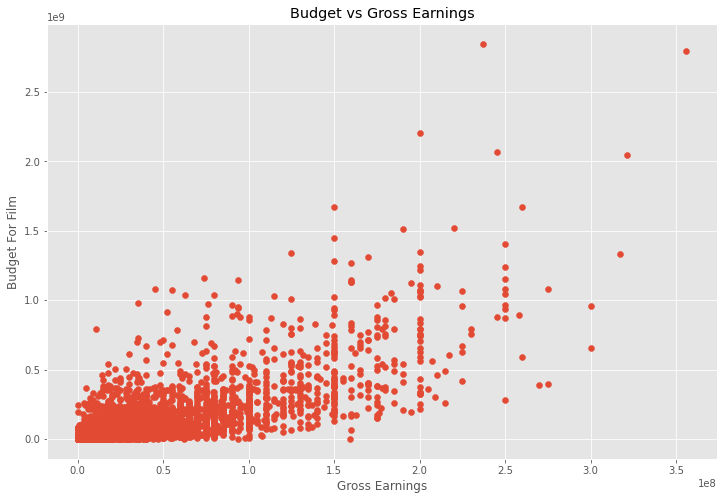

In [12]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget For Film')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

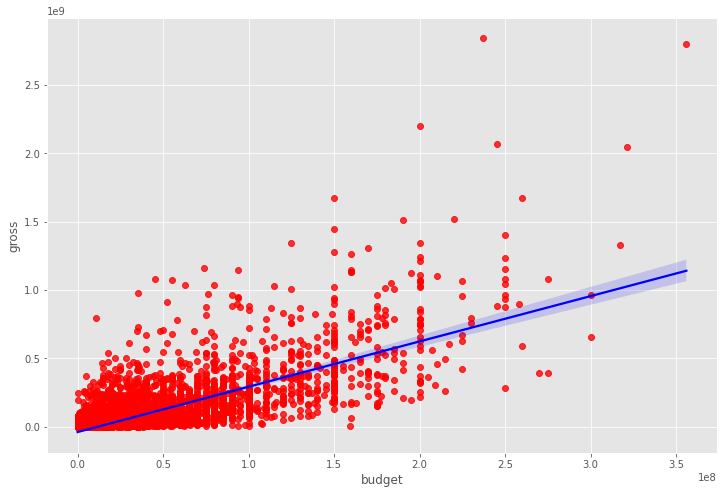

In [13]:
# Plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

In [14]:
# Let's start Looking at correlation

In [15]:
# Types of correlation are: pearson, kendall, spearman

df.corr(method='pearson')

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.265578,0.252042,0.116358
score,0.092616,1.000000,0.407101,0.066569,0.181331,0.394564
votes,0.222427,0.407101,1.000000,0.421195,0.628677,0.306984
budget,0.265578,0.066569,0.421195,1.000000,0.711270,0.263673
gross,0.252042,0.181331,0.628677,0.711270,1.000000,0.239449
runtime,0.116358,0.394564,0.306984,0.263673,0.239449,1.000000


In [16]:
# High correlation between budget and gross
# I was right

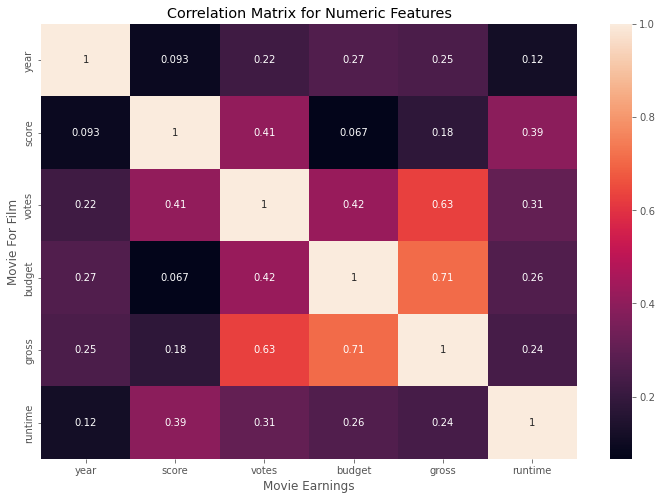

In [17]:
correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Earnings')
plt.ylabel('Movie For Film')

plt.show()

In [18]:
# Looks at Company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [19]:
df.numerized = df

for col_name in df.numerized.columns:
    if(df.numerized[col_name].dtype == 'object'):
        df.numerized[col_name] = df.numerized[col_name].astype('category')
        df.numerized[col_name] = df.numerized[col_name].cat.codes

df.numerized

C:\Users\Rafik\AppData\Local\Temp\ipykernel_25548\3322322691.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.numerized = df


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,7,6,1980,1705,8.4,927000.0,2589,4015,1047,55,19000000,46998772,2320,146.0
1,5573,7,1,1980,1492,5.8,65000.0,2269,1632,327,56,4500000,58853106,731,104.0
2,5142,5,0,1980,1771,8.7,1200000.0,1111,2567,1745,56,18000000,538375067,1540,124.0
3,286,5,4,1980,1492,7.7,221000.0,1301,2000,2247,56,3500000,83453539,1813,88.0
4,1027,7,4,1980,1543,7.3,108000.0,1054,521,410,56,6000000,39846344,1777,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,4,6,2020,2964,3.1,18.0,1500,2289,2422,56,7000,78500541,1780,90.0
7664,1678,4,4,2020,1107,4.7,36.0,774,2614,1886,56,35589876,78500541,539,90.0
7665,4717,4,6,2020,193,5.7,29.0,2061,2683,2040,56,58750,78500541,941,0.0
7666,2843,4,6,2020,2817,0.0,0.0,1184,1824,450,56,15000,78500541,1780,120.0


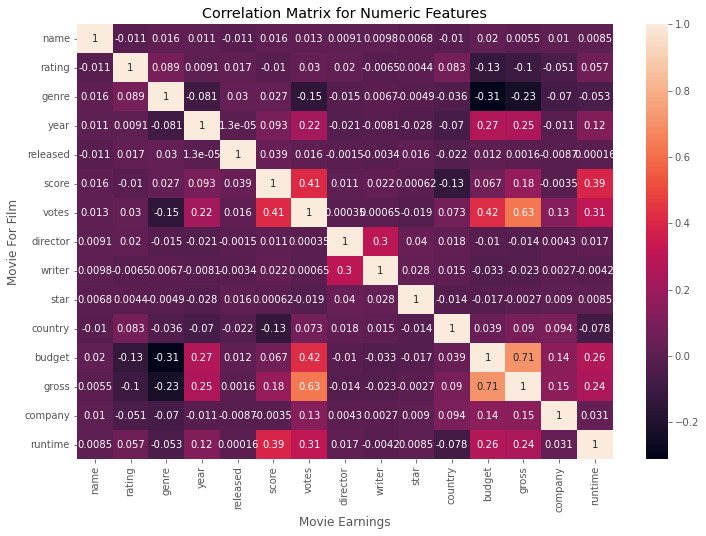

In [20]:
correlation_matrix = df.numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Earnings')
plt.ylabel('Movie For Film')

plt.show()

In [21]:
df.numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.011090,0.016355,0.011453,-0.010557,0.016377,0.013038,0.009079,0.009758,0.006754,-0.010468,0.020368,0.005466,0.010139,0.008483
rating,-0.011090,1.000000,0.088535,0.009119,0.017246,-0.010067,0.029943,0.020238,-0.006486,0.004431,0.082703,-0.131074,-0.102508,-0.051490,0.057060
genre,0.016355,0.088535,1.000000,-0.081261,0.030384,0.027384,-0.145296,-0.015258,0.006702,-0.004850,-0.036374,-0.310566,-0.230267,-0.070398,-0.052914
year,0.011453,0.009119,-0.081261,1.000000,0.000013,0.092616,0.222427,-0.020795,-0.008121,-0.027761,-0.069930,0.265578,0.252042,-0.011224,0.116358
released,-0.010557,0.017246,0.030384,0.000013,1.000000,0.039237,0.015916,-0.001524,-0.003432,0.015562,-0.022218,0.012245,0.001616,-0.008733,0.000161
score,0.016377,-0.010067,0.027384,0.092616,0.039237,1.000000,0.407101,0.010568,0.022387,0.000617,-0.134542,0.066569,0.181331,-0.003536,0.394564
votes,0.013038,0.029943,-0.145296,0.222427,0.015916,0.407101,1.000000,0.000349,0.000654,-0.019322,0.073461,0.421195,0.628677,0.131432,0.306984
director,0.009079,0.020238,-0.015258,-0.020795,-0.001524,0.010568,0.000349,1.000000,0.299524,0.039725,0.017610,-0.010364,-0.014272,0.004292,0.017062
writer,0.009758,-0.006486,0.006702,-0.008121,-0.003432,0.022387,0.000654,0.299524,1.000000,0.028485,0.014674,-0.033233,-0.023207,0.002675,-0.004166
star,0.006754,0.004431,-0.004850,-0.027761,0.015562,0.000617,-0.019322,0.039725,0.028485,1.000000,-0.014500,-0.016954,-0.002674,0.008956,0.008511


In [22]:
correlation_mat = df.numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name     name        1.000000
         rating     -0.011090
         genre       0.016355
         year        0.011453
         released   -0.010557
                       ...   
runtime  country    -0.078066
         budget      0.263673
         gross       0.239449
         company     0.031294
         runtime     1.000000
Length: 225, dtype: float64

In [23]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget   genre     -0.310566
genre    budget    -0.310566
         gross     -0.230267
gross    genre     -0.230267
votes    genre     -0.145296
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [24]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes     gross       0.628677
gross     votes       0.628677
          budget      0.711270
budget    gross       0.711270
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [25]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation
# I was wrong